This workbook compares the original and derived data

In [1]:
import pandas as pd

In [2]:
original = pd.read_excel(
  '../../data/reference/Copy of NatCen 2023 - Administrative data on factors associated with youth NEET rates - Dataset.xlsx',
  sheet_name='Local Authority Data',
  index_col=[0, 1, 2]
).melt(ignore_index=False)
original.variable = original.variable.str.strip()
original = original.droplevel([1,2])
original = original.reset_index().set_index(['variable', 'Local Authority Code'])
original.size

5562

In [3]:
derived = pd.read_csv('../../data/processed/yff/neet-factors-sources.csv')
derived.variable = derived.variable.str.strip()
derived.set_index([
  'variable',
  'Local Authority Code'
], inplace=True)
derived = derived.loc[:, ['value']]
derived.size

5562

Simple correlation, rounding to 5 decimal place

In [13]:
pd.concat([
  derived.groupby('variable').corrwith(original, numeric_only=False).rename(columns={'value': 'corr'}),
  derived.div(original).groupby('variable').mean().rename(columns={'value': 'mean'})
], axis=1).sort_values('corr')


,corr,mean
variable,,
Economic inactivity (NEET),0.967595,0.579867
Qualification below level 2 (all),0.985773,1.022636
Unpaid carer (age 16-24),0.987009,0.976782
School Exclusions,0.999861,0.998500
Pupils with SEN support,0.999925,1.000322
School Suspensions,0.999931,1.000379
Fertility rates (age < 20),0.999976,0.998654
Fertility rates (age 20-24),0.999992,0.999173
School Absences,1.000000,1.000000


Data that seems wildly wrong:

* Economic inactivity (NEET) - big differences - looks like wrong dataset?

Minor differences between the original and derived data, possibly as a result of amended data being published

* Qualification below level 2 (all)
* Unpaid carer (age 16-24)
* School Exclusions / Suspensions (both are missing some derived data)
* Pupils with SEN Support
* Fertility Rates (2 datasets)

Note that `Disability (all)`, `Socially renting households` and `Children in poverty` datasets are rounded to the nearest 1 decimal place.


In [5]:
diff = pd.concat([original, derived], axis=1)
diff.columns=['original', 'derived']
diff.reset_index(inplace=True)
diff.drop('Local Authority Code', axis=1, inplace=True)

List instances where either original or derived is missing, but not both.

In [6]:
diff[
  diff[['original', 'derived']].isna().any(axis=1) &
  ~diff[['original', 'derived']].isna().all(axis=1)
].groupby('variable').count()

,original,derived
variable,,
IMD Crime,3,0
IMD Health,3,0
Lone parent households,3,0
School Absences,1,0
School Exclusions,181,0
School Suspensions,181,0


Show counts of each variable

In [7]:
diff.groupby('variable').count()

,original,derived
variable,,
Children in poverty,309,309
Children looked after,128,128
Disability (age < 25),309,309
Disability (all),309,309
Economic inactivity (NEET),308,308
Fertility rates (age 20-24),309,309
Fertility rates (age < 20),309,309
IMD Crime,309,306
IMD Health,309,306


Plot some correlation charts

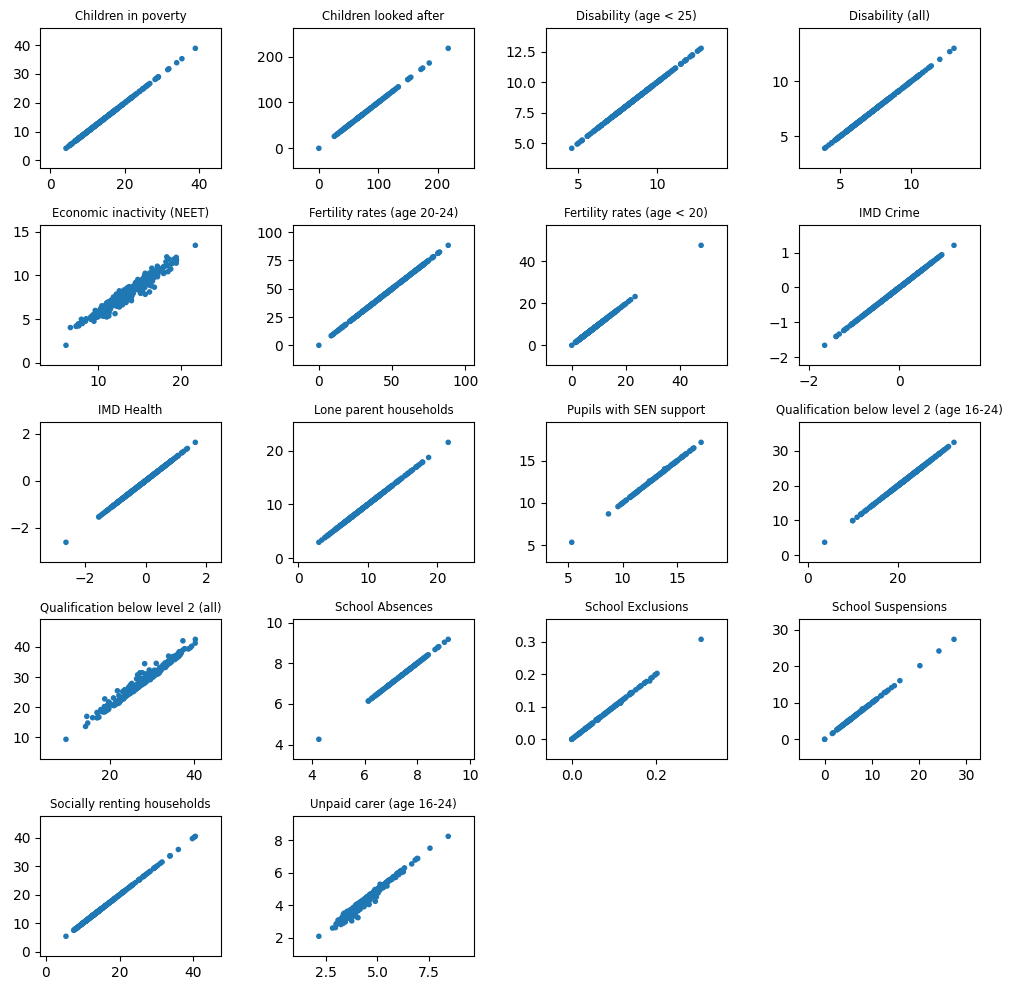

In [8]:
# diff.reset_index().plot.scatter(x='original', y='derived', c='variable')
import matplotlib.pyplot as plt

groups = diff.dropna().groupby('variable')
fig = plt.figure(figsize=(10, 10))

i=1
for name, group in groups:
    ax = plt.subplot(5, 4, i)
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
    ax.margins(0.2)
    ax.scatter(x=group.original, y=group.derived, marker='.', linestyle='')
    ax.set_title(name, fontsize='small')
    i+=1
plt.subplots_adjust(top=4)
plt.tight_layout()
# ax.legend()

plt.show()

In [9]:
original.groupby('variable').describe()

value                        \
                                         count       mean        std   
variable                                                               
Children in poverty                      309.0  13.951456   5.906356   
Children looked after                    128.0  80.085938  35.981191   
Disability (age < 25)                    309.0   8.502296   1.494361   
Disability (all)                         309.0   7.363754   1.735266   
Economic inactivity (NEET)               308.0  13.165789   2.754589   
Fertility rates (age 20-24)              309.0  46.152427  16.970977   
Fertility rates (age < 20)               309.0   8.178641   4.716412   
IMD Crime                                309.0  -0.138616   0.518621   
IMD Health                               309.0  -0.125296   0.641458   
Lone parent households                   304.0   9.717331   3.149875   
Pupils with SEN support                  128.0  13.018461   1.909094   
Qualification below level 2 (age 16-24)  309.0  21.909973   4.275944   
Qualification below level 2 (all)        309.0  27.571843   5.290158   
School Absences                          128.0   7.446673   0.722130   
School Exclusions                        309.0   0.079387   0.057230   
School Suspensions                       309.0   6.842475   3.356109   
Socially renting households              309.0  15.803560   5.911514   
Unpaid carer (age 16-24)                 309.0   4.473599   0.826265   

                                                                         \
                                              min        25%        50%   
variable                                                                  
Children in poverty                      4.200000   9.500000  12.800000   
Children looked after                    0.000000  52.750000  73.000000   
Disability (age < 25)                    4.598139   7.527225   8.421053   
Disability (all)                         3.900000   6.000000   7.200000   
Economic inactivity (NEET)               6.068841  11.173757  12.729448   
Fertility rates (age 20-24)              0.000000  34.300000  46.000000   
Fertility rates (age < 20)               0.000000   4.900000   7.300000   
IMD Crime                               -1.656000  -0.522000  -0.138000   
IMD Health                              -2.625000  -0.587000  -0.132000   
Lone parent households                   2.964427   7.499003   9.372748   
Pupils with SEN support                  5.323194  11.529996  13.107475   
Qualification below level 2 (age 16-24)  3.717135  19.739621  21.934677   
Qualification below level 2 (all)        9.392955  24.070646  27.293915   
School Absences                          4.263970   6.915955   7.531215   
School Exclusions                        0.000000   0.034520   0.070420   
School Suspensions                       0.000000   4.775920   6.178370   
Socially renting households              5.500000  12.100000  14.200000   
Unpaid carer (age 16-24)                 2.179837   3.949612   4.394109   

                                                                
                                               75%         max  
variable                                                        
Children in poverty                      16.900000   38.900000  
Children looked after                    99.500000  218.000000  
Disability (age < 25)                     9.419829   12.781885  
Disability (all)                          8.500000   13.000000  
Economic inactivity (NEET)               15.364776   21.751758  
Fertility rates (age 20-24)              58.600000   88.400000  
Fertility rates (age < 20)               10.800000   47.600000  
IMD Crime                                 0.239000    1.206000  
IMD Health                                0.344000    1.643000  
Lone parent households                   11.468158   21.568627  
Pupils with SEN support                  14.197479   17.208413  
Qualification below level 2 (age 16-24)  2

In [10]:
derived.groupby('variable').describe()

value                        \
                                         count       mean        std   
variable                                                               
Children in poverty                      309.0  13.951456   5.906356   
Children looked after                    128.0  80.085938  35.981191   
Disability (age < 25)                    309.0   8.502296   1.494361   
Disability (all)                         309.0   7.363754   1.735266   
Economic inactivity (NEET)               308.0   7.669404   1.834506   
Fertility rates (age 20-24)              309.0  46.122330  16.975008   
Fertility rates (age < 20)               309.0   8.165696   4.707716   
IMD Crime                                306.0  -0.138582   0.521165   
IMD Health                               306.0  -0.125163   0.644604   
Lone parent households                   301.0   9.717241   3.165585   
Pupils with SEN support                  128.0  13.022759   1.910200   
Qualification below level 2 (age 16-24)  309.0  21.909973   4.275944   
Qualification below level 2 (all)        309.0  28.198793   5.527489   
School Absences                          127.0   7.446200   0.724970   
School Exclusions                        128.0   0.082248   0.053771   
School Suspensions                       128.0   7.051930   3.971820   
Socially renting households              309.0  15.803560   5.911514   
Unpaid carer (age 16-24)                 309.0   4.378200   0.865228   

                                                                         \
                                              min        25%        50%   
variable                                                                  
Children in poverty                      4.200000   9.500000  12.800000   
Children looked after                    0.000000  52.750000  73.000000   
Disability (age < 25)                    4.598139   7.527225   8.421053   
Disability (all)                         3.900000   6.000000   7.200000   
Economic inactivity (NEET)               1.992754   6.385059   7.327750   
Fertility rates (age 20-24)              0.000000  34.300000  45.900000   
Fertility rates (age < 20)               0.000000   4.900000   7.300000   
IMD Crime                               -1.656000  -0.526500  -0.137000   
IMD Health                              -2.625000  -0.590000  -0.129000   
Lone parent households                   2.964427   7.496013   9.283626   
Pupils with SEN support                  5.323194  11.559636  13.107475   
Qualification below level 2 (age 16-24)  3.717135  19.739621  21.934677   
Qualification below level 2 (all)        9.391278  24.568130  27.908333   
School Absences                          4.263969   6.915769   7.536227   
School Exclusions                        0.000000   0.038852   0.078419   
School Suspensions                       0.000000   4.852478   6.201788   
Socially renting households              5.500000  12.100000  14.200000   
Unpaid carer (age 16-24)                 2.088773   3.823720   4.282808   

                                                                
                                               75%         max  
variable                                                        
Children in poverty                      16.900000   38.900000  
Children looked after                    99.500000  218.000000  
Disability (age < 25)                     9.419829   12.781885  
Disability (all)                          8.500000   13.000000  
Economic inactivity (NEET)                8.966403   13.456545  
Fertility rates (age 20-24)              58.500000   88.400000  
Fertility rates (age < 20)               10.700000   47.600000  
IMD Crime                                 0.254750    1.206000  
IMD Health                                0.352250    1.643000  
Lone parent households                   11.486486   21.568627  
Pupils with SEN support                  14.197479   17.208413  
Qualification below level 2 (age 16-24)  2

In [11]:
original.loc[('Unpaid carer (age 16-24)'), :]

,value
Local Authority Code,
E06000001,6.085036
E06000002,5.197144
E06000003,5.755337
E06000004,5.270583
E06000005,5.275876
...,...
E09000029,4.410821
E09000030,4.073512
E09000031,4.582488


In [12]:
derived.loc[('Unpaid carer (age 16-24)'), :]

,value
Local Authority Code,
E06000001,6.095155
E06000002,5.045736
E06000003,5.750144
E06000004,5.216711
E06000005,5.257349
...,...
E09000029,4.413100
E09000030,3.889538
E09000031,4.554707
